### Bike Sharing Assignment

#### Reading and Understanding Data

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the Dataset
boombikes = pd.read_csv("day.csv")

In [3]:
#Analysing the Dataset
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
boombikes.shape

(730, 16)

In [5]:
#inspecting the Dataset
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 88.5+ KB


##### There is no missing value and hence no need for imputations.

In [6]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Visualizing the Data

In [7]:
# importing visualizing libraries
import matplotlib.pyplot as plt
import seaborn as sns

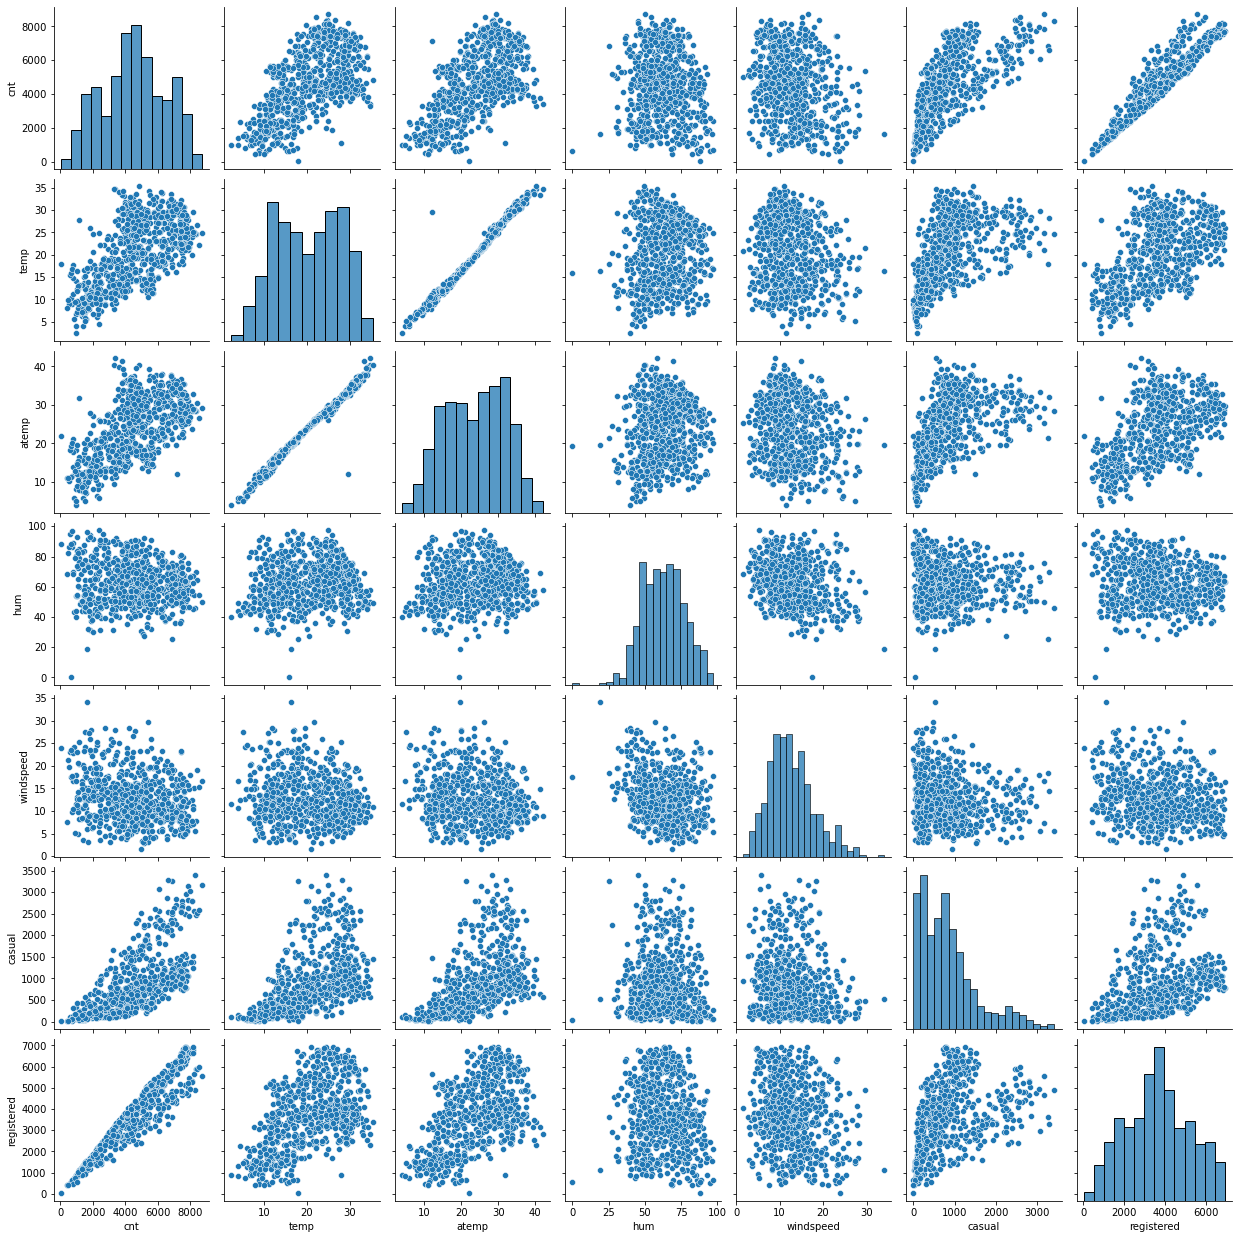

In [8]:
# pairplot analysis for numeric variables
vars=['cnt','temp','atemp','hum','windspeed','casual','registered']
sns.pairplot(boombikes[vars])
plt.show()

It is observed that, variables like registered, temp, atemp have clear correlaion with target('cnt') variable.

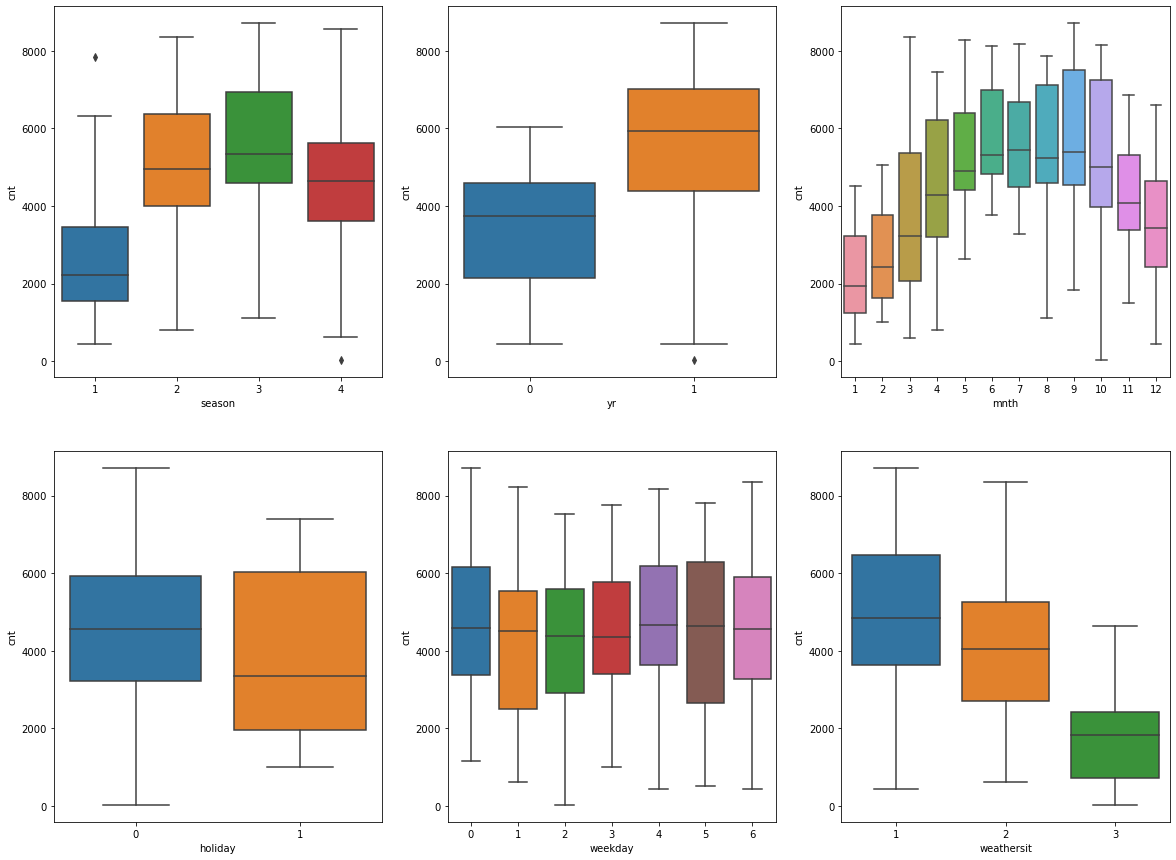

In [9]:
# boxplot analysis for categorical variables
plt.figure(figsize=[20,15])
plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=boombikes)
plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=boombikes)
plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=boombikes)
plt.subplot(2,3,4)
sns.boxplot(x='holiday',y='cnt',data=boombikes)
plt.subplot(2,3,5)
sns.boxplot(x='weekday',y='cnt',data=boombikes)
plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=boombikes)
plt.show()

1. The count of total rental bikes is highest during season 'Fall' and is relatively very low during 'Spring'.
2. The overall business is increasing. i.e, it is higher in 2019 than 2018.
3. The month column shows the trend similar to the Season trend.
4. During holidays, the users are a bit less than that of during normal days.
5. Business is a bit low during mid weekdays, Tuesday and Wednesday comparitively to other days.
6. The count of total rental bikes is high when the weather is clearer and is very low when there is Light snow or heavy rain.

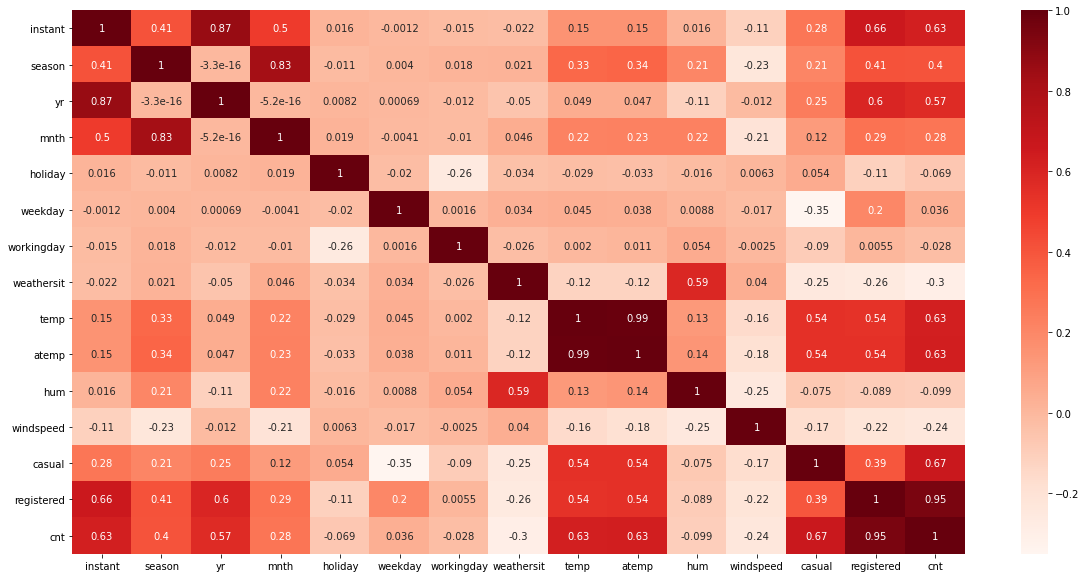

In [10]:
# Analysing the correlation among the variables
plt.figure(figsize=[20,10])
sns.heatmap(boombikes.corr(),annot=True,cmap='Reds')
plt.show()

So, it is evident from the heatmap that variables registered, casual, temp, atemp, instant have the highest correlation with the Target Variable cnt.

##### Creation of Dummy Variables

Variables such as season, months, weekday, weathersit contains multiple levels.
So first we need to convert them to categorical and then create dummy variables for the same.

In [11]:
# For variable season (Converting to categorical)
boombikes.season = boombikes.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
boombikes.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [12]:
# For variable season (Creating Dummy Variable)
season = pd.get_dummies(boombikes.season, drop_first=True) #Dropping the first variable to get n-1 levels.

In [13]:
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [14]:
# Adding the results to the original boombikes dataframe
boombikes = pd.concat([boombikes, season], axis = 1)
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,spring,summer,winter
0,1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,1,0,0
1,2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1,0,0
2,3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,1,0,0
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,1,0,0
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,1,0,0


In [15]:
# Similarly for months
boombikes.mnth = boombikes.mnth.map({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})
boombikes.mnth.value_counts()

jan    62
dec    62
jul    62
aug    62
may    62
oct    62
mar    62
apr    60
jun    60
sep    60
nov    60
feb    56
Name: mnth, dtype: int64

In [16]:
mnth = pd.get_dummies(boombikes.mnth, drop_first=True)
mnth.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [17]:
boombikes = pd.concat([boombikes, mnth], axis = 1)
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,1,01-01-2018,spring,0,jan,0,1,1,2,14.110847,...,0,0,1,0,0,0,0,0,0,0
1,2,02-01-2018,spring,0,jan,0,2,1,2,14.902598,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,spring,0,jan,0,3,1,1,8.050924,...,0,0,1,0,0,0,0,0,0,0
3,4,04-01-2018,spring,0,jan,0,4,1,1,8.200000,...,0,0,1,0,0,0,0,0,0,0
4,5,05-01-2018,spring,0,jan,0,5,1,1,9.305237,...,0,0,1,0,0,0,0,0,0,0


In [18]:
# For weekday
boombikes.weekday = boombikes.weekday.map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})
boombikes.weekday.value_counts()

mon    105
tue    105
fri    104
thu    104
sun    104
sat    104
wed    104
Name: weekday, dtype: int64

In [19]:
weekday = pd.get_dummies(boombikes.weekday, drop_first=True)
weekday.head()

,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [20]:
boombikes = pd.concat([boombikes, weekday], axis = 1)
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,1,01-01-2018,spring,0,jan,0,mon,1,2,14.110847,...,0,0,0,0,1,0,0,0,0,0
1,2,02-01-2018,spring,0,jan,0,tue,1,2,14.902598,...,0,0,0,0,0,0,0,0,1,0
2,3,03-01-2018,spring,0,jan,0,wed,1,1,8.050924,...,0,0,0,0,0,0,0,0,0,1
3,4,04-01-2018,spring,0,jan,0,thu,1,1,8.200000,...,0,0,0,0,0,0,0,1,0,0
4,5,05-01-2018,spring,0,jan,0,fri,1,1,9.305237,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Same way for weathersit
boombikes.weathersit = boombikes.weathersit.map({1:'clear', 2:'misty', 3:'cloudy', 4:'rainy'})
boombikes.weathersit.value_counts()

clear     463
misty     246
cloudy     21
Name: weathersit, dtype: int64

In [22]:
# Since there is no record for rainy weathersit, we can ignore that and consider only 3 levels and can create only 2 dummy variables
weathersit = pd.get_dummies(boombikes.weathersit, drop_first=True)
weathersit.head()

,cloudy,misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [23]:
boombikes = pd.concat([boombikes, weathersit], axis = 1)
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,oct,sep,mon,sat,sun,thu,tue,wed,cloudy,misty
0,1,01-01-2018,spring,0,jan,0,mon,1,misty,14.110847,...,0,0,1,0,0,0,0,0,0,1
1,2,02-01-2018,spring,0,jan,0,tue,1,misty,14.902598,...,0,0,0,0,0,0,1,0,0,1
2,3,03-01-2018,spring,0,jan,0,wed,1,clear,8.050924,...,0,0,0,0,0,0,0,1,0,0
3,4,04-01-2018,spring,0,jan,0,thu,1,clear,8.200000,...,0,0,0,0,0,1,0,0,0,0
4,5,05-01-2018,spring,0,jan,0,fri,1,clear,9.305237,...,0,0,0,0,0,0,0,0,0,0


We have created the dummy variables for the categorical variables. Now let us drop the original variables from the dataset.

In [24]:
# Dropping the categorical variables for which we have created the dummy variables
boombikes.drop(columns=['season','mnth','weekday','weathersit'], inplace=True)

In [25]:
# Dropping the variables which are irrelevant variables instant and dteday
boombikes.drop(columns=['instant','dteday'], inplace=True)

In the dataset,we have casual and registered variables which are directly contribute to the increase in bike user's count.
The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. So, we can consider only one varible 'registered' out of these 2 since it has most linearity with the Target variable.

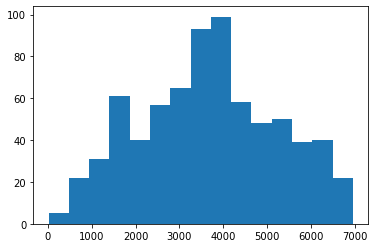

In [26]:
plt.hist(boombikes.registered, bins=15)
plt.show()

In [27]:
# Converting register variable to categorical one by breaking it down to bins
bins= ['very low', 'low', 'medium', 'high', 'very high']
boombikes['registered_bins'] = pd.qcut(boombikes['registered'], q=[0,0.2,0.4,0.6,0.8,1], labels=bins)

In [28]:
boombikes.registered_bins.value_counts()

very low     146
low          146
medium       146
high         146
very high    146
Name: registered_bins, dtype: int64

In [29]:
# Creating dummy variable for this new categorical variable
registered_bins = pd.get_dummies(boombikes.registered_bins, drop_first=True)
registered_bins.head()

,low,medium,high,very high
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0


In [30]:
boombikes = pd.concat([boombikes, registered_bins], axis = 1)
boombikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,thu,tue,wed,cloudy,misty,registered_bins,low,medium,high,very high
0,0,0,1,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,1,very low,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,1,0,0,1,very low,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,1,0,0,very low,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,1,0,0,0,0,very low,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,very low,0,0,0,0


In [31]:
# Dropping the redundant/original columns
boombikes.drop(columns=['registered','registered_bins'], inplace=True)

In [32]:
# Dropping 'casual' variable since we are considering registered column.
boombikes.drop(columns=['casual'], inplace=True)

In [33]:
# Since temp and atemp columns are complement each other, we can consider only one column.
# So, Dropping 'atemp' variable since we are considering temp column.
boombikes.drop(columns=['atemp'], inplace=True)

In [34]:
# Checking the dataset after preparing the Data for Model building
boombikes.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,sun,thu,tue,wed,cloudy,misty,low,medium,high,very high
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Splitting the Data into Training and Testing Data

In [35]:
# importing libraries
from sklearn.model_selection import train_test_split

In [36]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(boombikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [37]:
#Checking the shape of the datasets
df_train.shape

(510, 33)

In [38]:
df_test.shape

(219, 33)

#### Rescaling the Feature Variables

Since the columns temp, atemp, hum and windspeed have larger decimal valuescompared to others. So, we use MinMax scaling technique to rescale them.

In [39]:
# importing libraries
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [42]:
# Applying fit_transfer on train dataset
# Applying scaler() to all the columns except the binary and 'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [43]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,sun,thu,tue,wed,cloudy,misty,low,medium,high,very high
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.137255,0.143137,0.152941,0.135294,0.029412,0.343137,0.200000,0.198039,0.188235,0.205882
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.344454,0.350557,0.360284,0.342373,0.169124,0.475223,0.400393,0.398913,0.391284,0.404742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,sun,thu,tue,wed,cloudy,misty,low,medium,high,very high
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,1,0,0,0,0,0,1
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,1,0,0,0,0,1,1,0,0,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,1,0,0,0,0,1,1,0,0,0


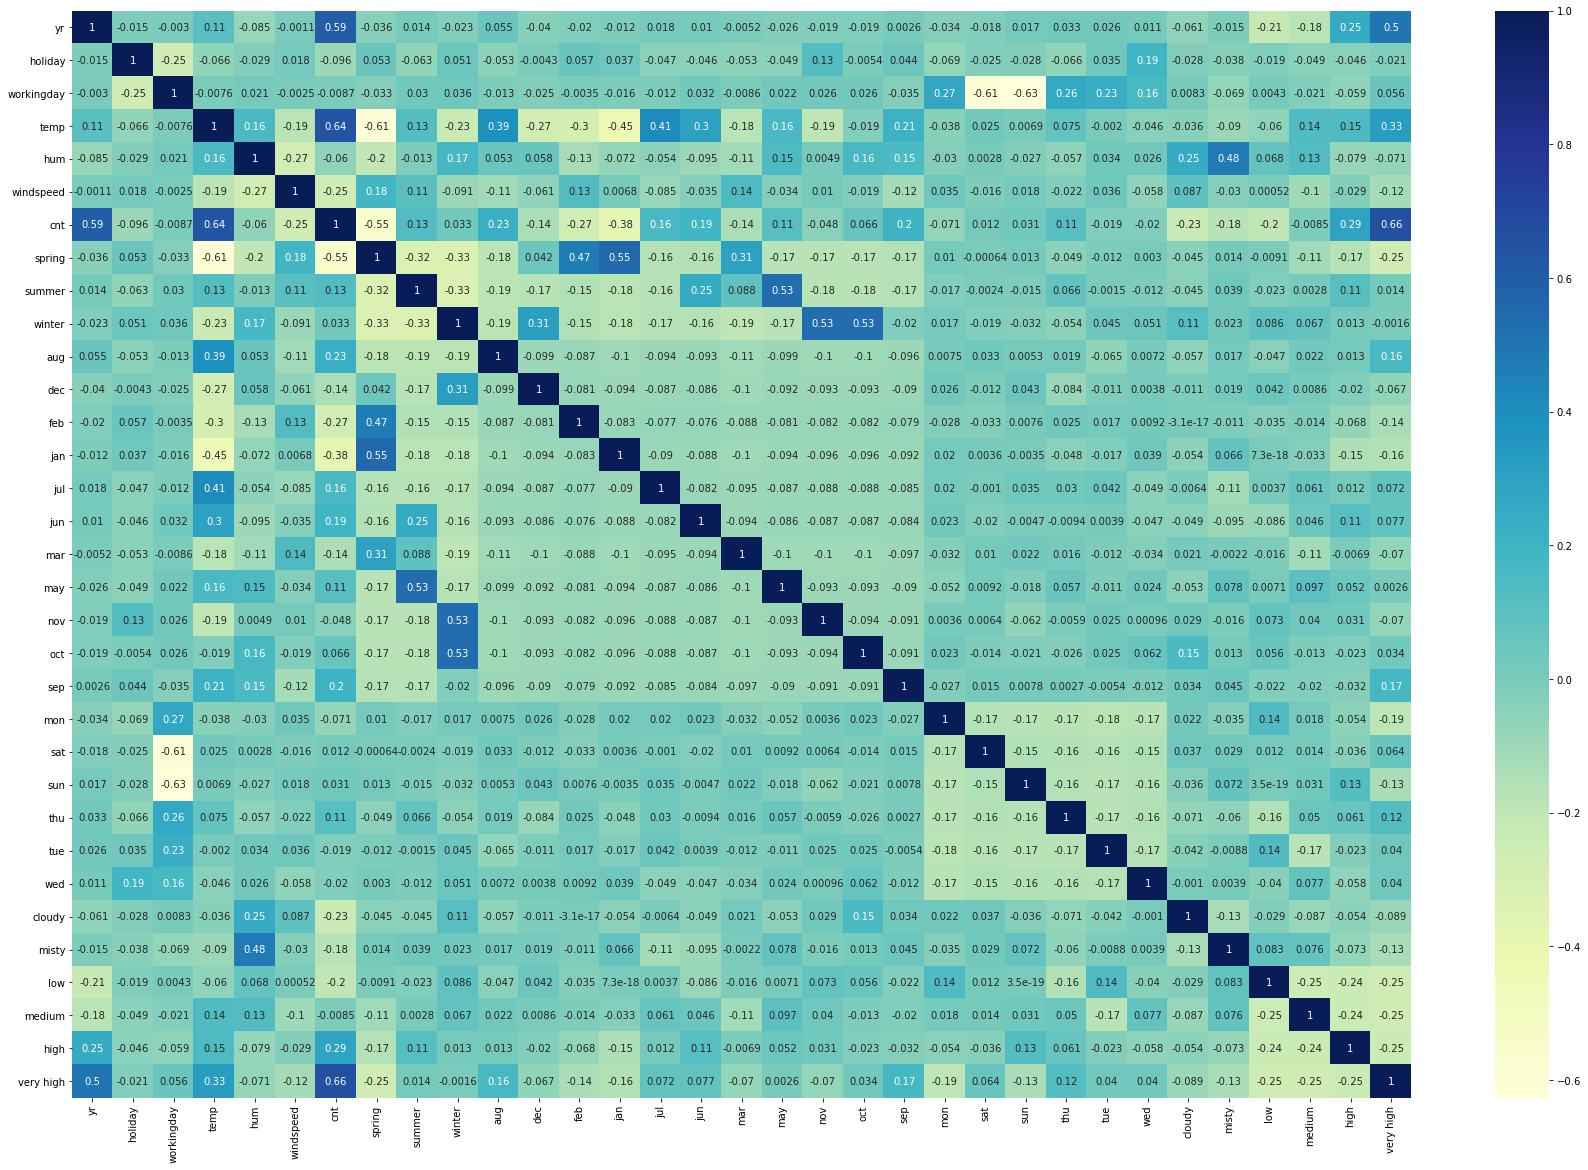

In [45]:
# Now Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

It is clear that temp variable is correlated to cnt the most along with very high registered users.
So, we pick area as the first variable and we'll try to fit a regression line to that.

#### Dividing into X and Y sets for the Model Building

In [46]:
y_train = df_train.pop('cnt')
X_train = df_train

#### Building a Linear Model

##### Model 1: Using a single selected variable - temp

In [48]:
#importing libraries
import statsmodels.api as sm

In [51]:
# Adding constant to training dataset and building linear model

X_train_lm = sm.add_constant(X_train['temp'])
lr_1 = sm.OLS(y_train, X_train_lm).fit()
lr_1.params

const    0.169798
temp     0.639952
dtype: float64

In [52]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     359.1
Date:                Tue, 04 Jan 2022   Prob (F-statistic):           5.80e-61
Time:                        11:47:17   Log-Likelihood:                 174.84
No. Observations:                 510   AIC:                            -345.7
Df Residuals:                     508   BIC:                            -337.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1698      0.020      8.628      0.000       0.131       0.208
temp           0.6400      0.034     18.949      0.000       0.574       0.706
==============================================================================
Omnibus:                        6.280   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.555
Skew:                           0.098   Prob(JB):                        0.103
Kurtosis:                       2.580   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We have R squared value of just 0.414 with just one variable 'temp'. So, only 41% of the variance is explained by the temp variable. P-value for the same is zero and hence thr feature is statistically significant.

Here, beta 0(slope) is 0.639952 and beta 1(intercept) is 0.169798.

##### Using RFE to select variables

In [54]:
# importing libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression